In [64]:
import numpy as np
import cv2
"""обработка изображений"""
img=cv2.imread('images/cat.jpg')

img=cv2.resize(img,(img.shape[1]//2,img.shape[0]//2))
# img=cv2.GaussianBlur(img,(11,11),10) #размытие
img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) #изменение цвета
img=cv2.Canny(img,200,200) #прописывает контуры


kernel=np.ones((5,5),np.uint8) #создаем ядро обводок
img=cv2.dilate(img,kernel,iterations=1) #создаем обводки

# img=cv2.erode(img,kernel,iterations=1) #уменьшаем жирность линий, создает эрозию


# opencv have got BGR format
cv2.imshow('Result',img[:240,25:300])
cv2.waitKey(0)

-1

In [65]:
"""обработка видео"""
cap=cv2.VideoCapture('videos/kamaz.mp4')
kernel=np.ones((5,5),np.uint8) #создаем ядро обводок

while True:
    success,img=cap.read()

    # img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) #изменение цвета
    # img=cv2.Canny(img,200,200) #прописывает контуры
    # img=cv2.dilate(img,kernel,iterations=1) #создаем обводки

    cv2.imshow('Result',img)
    if cv2.waitKey(2) & ord('q')==0xFF:
        break


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [60]:
import cv2
"""обработка видео с камеры"""
cap=cv2.VideoCapture(0)
cap.set(3,500) #id ширины 3
cap.set(4,300) #id высоты 4

while True:
    success,img=cap.read()
    cv2.imshow('Result',img)
    if cv2.waitKey(2) & ord('q')==0xFF:
        break

KeyboardInterrupt: 

In [1]:
import cv2
import numpy as np
# opencv have got BGR format
photo=np.zeros((500,500,3),np.uint8)
# photo[10:150,20:200]=119,201,105
# (0,0) - верхний левый угол, (100,100) - размер фигуры, (,,) - color`

cv2.rectangle(photo,(0,0),(100,100),(119,201,105),thickness=cv2.FILLED)
cv2.circle(photo,(300,300),100,(119,201,105),thickness=cv2.FILLED)
cv2.line(photo,(photo.shape[0]//2,photo.shape[1]//2),(200,100),(119,201,105),thickness=3)
cv2.putText(
    photo,'Meow',org=(50,200),color=(119,201,105),thickness=1,
    fontFace=cv2.FONT_HERSHEY_TRIPLEX,fontScale=1)
cv2.imshow('Photo',photo)
cv2.waitKey(0)

-1

In [8]:
import numpy as np
import cv2
"""Работа с изображениями"""
img=cv2.imread('images/cat.jpg')
def rotate(img_param,angle):
    height,width = img_param.shape[:2]
    point = (width//2,height//2)
    matrix = cv2.getRotationMatrix2D(point,angle,1)
    return cv2.warpAffine(img_param,matrix,(width,height))
# img=cv2.flip(img,1)
# img=rotate(img,90)

def move(img_param,x,y):
    matrix = np.float32([[1,0,x],[0,1,y]])
    return cv2.warpAffine(img_param,matrix,(img_param.shape[1],img_param.shape[0]))

# img=move(img,30,50)
img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img=cv2.GaussianBlur(img,(5,5),0) #нечетные числа

img=cv2.Canny(img,100,140)

con,hier = cv2.findContours(img,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE) #метод который находит контур, RETR_LIST -все контуры

new_img=np.zeros(img.shape,dtype='uint8')
cv2.drawContours(new_img,con,-1,(221,5,195),1) # пиздим контуры из другой картинки

cv2.imshow('test',new_img)
cv2.waitKey(0)

-1

In [5]:
import numpy as np
import cv2
"""работа с цветовыми гаммами"""
img=cv2.imread('images/cat.jpg')

# img=cv2.cvtColor(img, cv2.COLOR_BGR2LAB) #LAB - 1 слой , HUE - градусное представление

img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
r,g,b=cv2.split(img)

img=cv2.merge([r,g,b])
cv2.imshow('Result',img)
cv2.waitKey(0)

-1

In [9]:
"""обьединение изображений"""
import cv2
import numpy as np


photo=cv2.imread('images/cat.jpg')

img=np.zeros(photo.shape[:2],np.uint8)


circle=cv2.circle(img.copy(),(325,250),240,255,-1)

rectangle=cv2.rectangle(img.copy(),(25,25),(250,350),255,-1)

img= cv2.bitwise_and(photo,photo, mask=circle) #вырезаем круг котейки
# img=cv2.bitwise_and(circle,rectangle) #находит одинаковые части для 2 изображений
# img=cv2.bitwise_or(circle,rectangle) #н=обьединение 2 изображений
# img=cv2.bitwise_xor(circle,rectangle) #обьединение 2 изображений, кроме пересечений
# img=cv2.bitwise_not(circle) #инверсия

cv2.imshow('Photo',img)
cv2.waitKey(0)

-1

In [21]:
"""Распознавание лиц"""
import cv2
import numpy as np

img = cv2.imread('images/blackman.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

faces = cv2.CascadeClassifier('face.xml') #использует натренированную модель
res = faces.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors=3)

for (x,y,w,h) in res:
    cv2.rectangle(img,(x,y), (x+w,y+h), (0,0,255),thickness=3)
cv2.imshow('Res',img)
cv2.waitKey(0)

-1

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


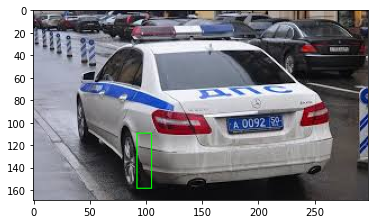

In [37]:
"""номерные знаки"""
import imutils
import easyocr
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('cars/6.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
filter_img = cv2.bilateralFilter(gray,11,15,15)
edges = cv2.Canny(filter_img,30,200)

cont = cv2.findContours(edges.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cont = imutils.grab_contours(cont)
cont = sorted(cont, key=cv2.contourArea, reverse=True)
pos = None

for c in cont:
    approx = cv2.approxPolyDP(c, 10, True) #ищем знаки 10-примерно квадрат

    if len(approx) == 4:
        pos = approx
        break
mask = np.zeros(gray.shape, np.uint8)
new_img = cv2.drawContours(mask, [pos],0,255,-1)
bt_img=cv2.bitwise_and(img,img,mask=mask)
# print(pos)

x,y =np.where(mask==255)
x1,y1=np.min(x),np.min(y)
x2,y2=np.max(x),np.max(y)

cropp=gray[x1:x2,y1:y2]
text=easyocr.Reader(['ru'])
# text=text.readtext(text)
# res = text[0][-2]

final_img=cv2.rectangle(img,(x1,x2),(y1,y2),(0,255,0),1)
plt.imshow( cv2.cvtColor(final_img,cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
print(text.readtext(cropp))


[]
